In [53]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Part 1

In [54]:
dataframe = pd.read_excel(r"PS1_Q2 Tag Data - Pandas.xls")

In [55]:
dataframe.head()

,CAR ID,ST(3100),TIME-3100,ST(900),TIME-900
0,2232,3100,12:03:26,900,12:21:47
1,1963,3100,12:05:28,900,12:12:23
2,2128,3100,12:13:22,900,12:20:45
3,2207,3100,12:15:15,900,12:22:08
4,1960,3100,12:16:55,900,12:23:13


In [56]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CAR ID     459 non-null    int64 
 1   ST(3100)   459 non-null    int64 
 2   TIME-3100  459 non-null    object
 3   ST(900)    459 non-null    int64 
 4   TIME-900   459 non-null    object
dtypes: int64(3), object(2)
memory usage: 18.1+ KB


In [57]:
# dataframe.sort_values(by  = dataframe['TIME-900'])
# dataframe['Time'] = dataframe['TIME-900']

In [58]:
dataframe['Time_Day'] = dataframe['TIME-900']
dataframe['TIME-3100'] = pd.to_datetime(dataframe['TIME-3100'], format = '%H:%M:%S')
dataframe['TIME-900'] = pd.to_datetime(dataframe['TIME-900'], format = '%H:%M:%S')

In [59]:
dataframe.head()

,CAR ID,ST(3100),TIME-3100,ST(900),TIME-900,Time_Day
0,2232,3100,1900-01-01 12:03:26,900,1900-01-01 12:21:47,12:21:47
1,1963,3100,1900-01-01 12:05:28,900,1900-01-01 12:12:23,12:12:23
2,2128,3100,1900-01-01 12:13:22,900,1900-01-01 12:20:45,12:20:45
3,2207,3100,1900-01-01 12:15:15,900,1900-01-01 12:22:08,12:22:08
4,1960,3100,1900-01-01 12:16:55,900,1900-01-01 12:23:13,12:23:13


In [60]:
dataframe['Trip Time'] = (dataframe['TIME-900']  - dataframe['TIME-3100']).dt.total_seconds().div(60)
dataframe = dataframe[dataframe['Trip Time'] <= 20]

In [61]:
dataframe.index = dataframe['TIME-900']
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429 entries, 1900-01-01 12:21:47 to 1900-01-01 19:53:18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   CAR ID     429 non-null    int64         
 1   ST(3100)   429 non-null    int64         
 2   TIME-3100  429 non-null    datetime64[ns]
 3   ST(900)    429 non-null    int64         
 4   TIME-900   429 non-null    datetime64[ns]
 5   Time_Day   429 non-null    object        
 6   Trip Time  429 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 26.8+ KB


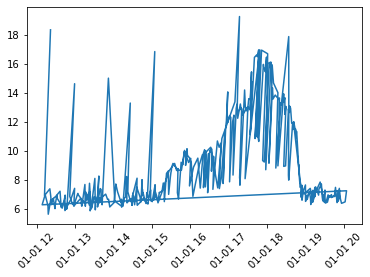

In [66]:
plt.plot(dataframe['TIME-900'], dataframe['Trip Time'] )
plt.xticks(rotation=45);

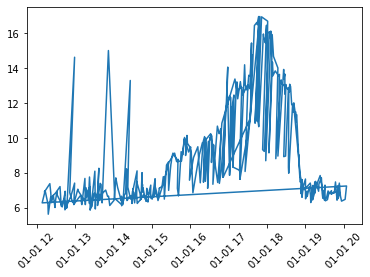

In [67]:
df1 = dataframe[:190]
df2 = dataframe[150:]
df1 = df1[df1['Trip Time'] < 12]
df2 = df2[df2['Trip Time'] < 17]
df3 = pd.concat([df1,df2])
plt.plot(df3['TIME-900'], df3['Trip Time'])
plt.xticks(rotation=45)
plt.show()

In [68]:
dataframe1 = df3['Trip Time'].resample('5min').mean()

In [69]:
dataframe1.head()

TIME-900
1900-01-01 12:05:00    6.283333
1900-01-01 12:10:00    6.950000
1900-01-01 12:15:00    5.925000
1900-01-01 12:20:00    6.760000
1900-01-01 12:25:00    6.344444
Freq: 5T, Name: Trip Time, dtype: float64

In [70]:
dataframe.head()


,CAR ID,ST(3100),TIME-3100,ST(900),TIME-900,Time_Day,Trip Time
TIME-900,,,,,,,
1900-01-01 12:21:47,2232,3100,1900-01-01 12:03:26,900,1900-01-01 12:21:47,12:21:47,18.350000
1900-01-01 12:12:23,1963,3100,1900-01-01 12:05:28,900,1900-01-01 12:12:23,12:12:23,6.916667
1900-01-01 12:20:45,2128,3100,1900-01-01 12:13:22,900,1900-01-01 12:20:45,12:20:45,7.383333
1900-01-01 12:22:08,2207,3100,1900-01-01 12:15:15,900,1900-01-01 12:22:08,12:22:08,6.883333
1900-01-01 12:23:13,1960,3100,1900-01-01 12:16:55,900,1900-01-01 12:23:13,12:23:13,6.300000


# Part 2

In [71]:
dataframe2 = pd.read_excel(r"PS1_Q2 Detector Data - Pandas.xls")

In [72]:
dataframe2.head()

,ABS PM,15.38,15.59,16.3,16.74,17.39,17.63,18.83,19.02,19.27,...,19.6,19.9,20.22,20.62,20.94,21.8,21.92,22.53,23.03,23.24
0,2006-09-13 12:00:00,55.0,61.5,61.3,64.6,59.4,64.4,62.8,66.1,55.1,...,64.8,64.4,64.1,65.6,63.8,64.5,65.0,65.6,60.4,62.9
1,2006-09-13 12:05:00,55.9,61.2,60.9,63.6,60.7,64.1,64.4,66.6,54.2,...,65.3,64.7,65.5,65.9,63.6,63.9,64.3,64.9,59.3,61.2
2,2006-09-13 12:10:00,54.4,60.6,59.3,63.6,60.3,64.2,62.3,66.2,54.8,...,63.9,62.6,64.6,65.8,63.0,62.8,64.4,63.8,59.3,61.0
3,2006-09-13 12:15:00,52.8,59.8,59.9,63.5,60.5,63.8,63.1,67.4,54.5,...,64.1,62.4,63.9,64.8,64.1,63.4,64.3,63.4,59.8,62.2
4,2006-09-13 12:20:00,55.1,61.0,59.5,64.4,60.3,64.2,62.9,66.5,54.5,...,63.6,61.6,65.6,65.4,63.6,63.5,64.2,63.7,59.9,62.8


In [73]:
23.24 - 15.38

7.859999999999998

In [74]:
segments = []

for i in range(len(dataframe2.columns)):
    if i >0 and i+1 < len(dataframe2.columns):
        segments.append(float(dataframe2.columns[i+1]) - float(dataframe2.columns[i]))
segments = [round(num, 5) for num in segments]    

In [75]:
average_speed_on_segment = []

In [76]:
list1 = []
for row in dataframe2.iterrows():
    i =0
    for j in range(1,len(row[1])):

        if j +1 < 21:       
            list1.append((row[1][j]+row[1][j+1])/2)
        
    average_speed_on_segment.append(list1)
    list1 =[]
   
    
  

In [78]:
segments

[0.21,
 0.71,
 0.44,
 0.65,
 0.24,
 1.2,
 0.19,
 0.25,
 0.26,
 0.07,
 0.3,
 0.32,
 0.4,
 0.32,
 0.86,
 0.12,
 0.61,
 0.5,
 0.21]

In [79]:
average_speed_on_segment = np.asarray(average_speed_on_segment)
segments = np.asarray(segments)
speed_inverse = average_speed_on_segment**-1

In [80]:
np.dot(average_speed_on_segment[0],segments)

495.74399999999997

In [81]:
speed_inverse.shape[0]

97

In [82]:
trip_time = []
for i in range(speed_inverse.shape[0]):
    trip_time.append(np.dot(speed_inverse[i],segments)*60)

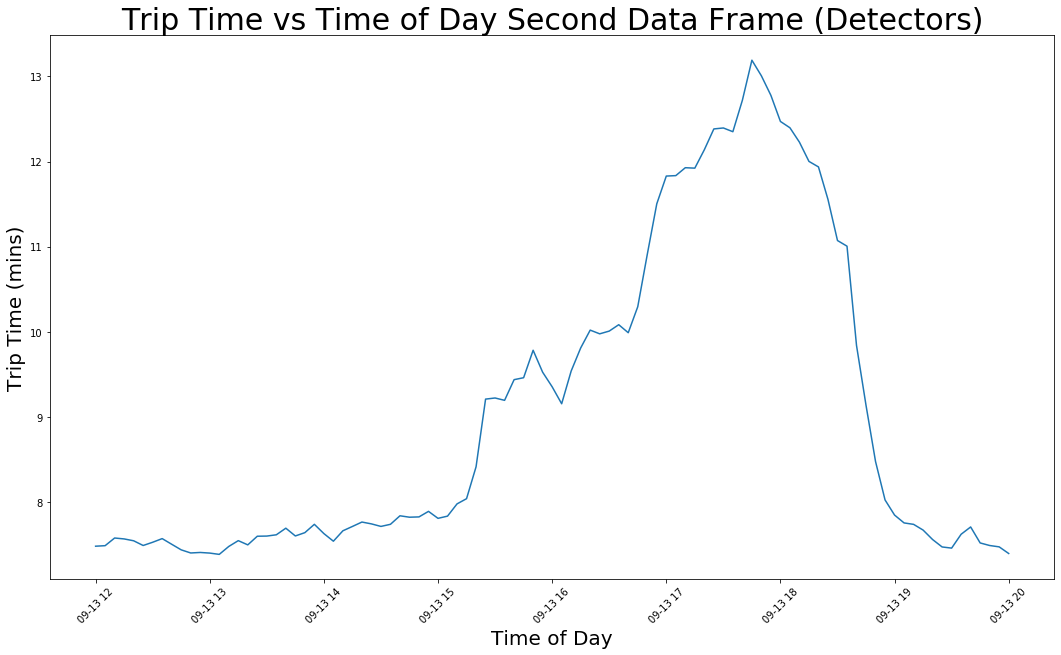

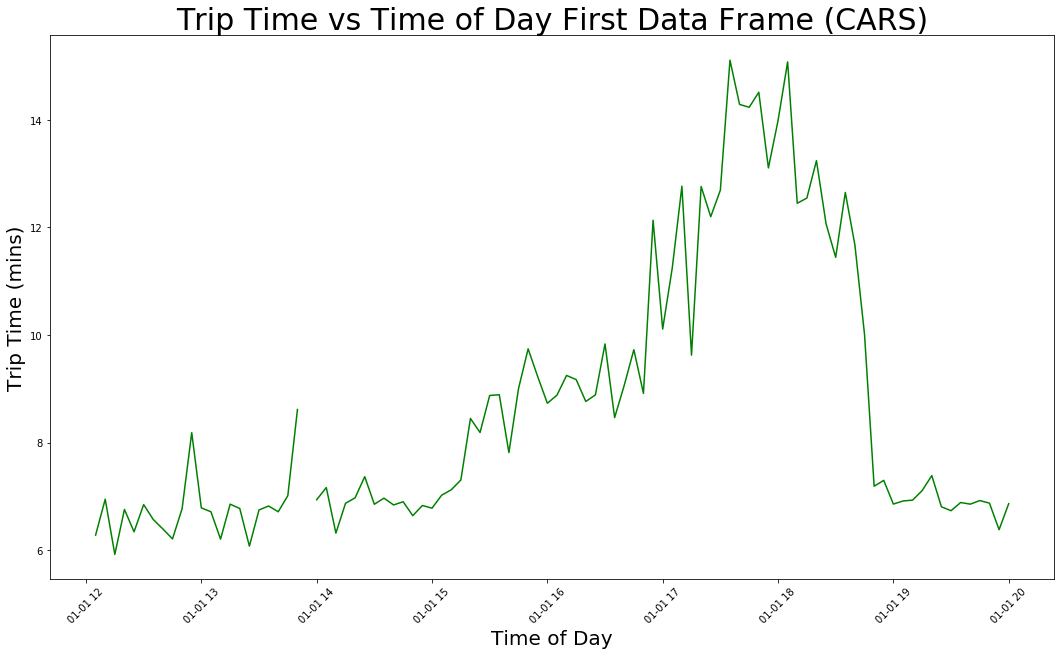

In [83]:
fig, ax = plt.subplots()

trip_time = np.asarray(trip_time)

time_of_day2 = dataframe2[dataframe2.columns[0]]
time_of_day2 = np.asarray(time_of_day2)


plt.plot(time_of_day2,trip_time)

ax.set_title('Trip Time vs Time of Day Second Data Frame (Detectors)', size = 30)

ax.set_ylabel('Trip Time (mins)', size = 20)
ax.set_xlabel('Time of Day', size = 20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)

plt.show()
###########################################
fig, ax = plt.subplots()

plt.plot(dataframe1.index,dataframe1, color = 'green')

ax.set_title('Trip Time vs Time of Day First Data Frame (CARS)', size = 30)

ax.set_ylabel('Trip Time (mins)', size = 20)
ax.set_xlabel('Time of Day', size = 20)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=45)

plt.show()